# MTA Data Analysis 

The New York subway MTA turnstile data is a series of data files containing cumulative number of entries and exits by station, turnstile, date and time . Data files are produced weekly, data records are collected typically every 4 hours with some exceptions .

_______________________________________________________________________________________________________________________________

The data which we'll use now to analyse is from 29 May to 27 August for 2021 year .

# Describing the columns of the data

>> C/A : Control Area ( e.g., A002 ) <br>
>> UNIT : Remote Unit for a station ( e.g., R051 )<br>
>> SCP : Subunit Channel Position represents an specific address for a device ( e.g., 02-00-00 )<br>
>> STATION : Represents the station name the device is located at<br>
>> LINENAME : Represents all train lines that can be boarded at this station <br>
>> DIVISION : Represents the Line originally the station belonged to BMT, IRT, or IND <br>
>> DATE : Represents the date ( MM-DD-YY )<br>
>> TIME : Represents the time ( hh:mm:ss ) for a scheduled audit event<br>
>> DESC : Represent the " REGULAR " scheduled audit event ( Normally occurs every 4 hours )<br>
>> ENTRIES : The comulative entry register value for a device<br>
>> EXITS : The cumulative exit register value for a device<br>

# Steps of Exploratory Data Analysis

1. Loading the data <br>
2. Cleaning the data <br>
3. Visualizing the data<br>

# 1. Loading the data from SQL file

In [1]:
#Importing some important packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy import inspect
from datetime import datetime as dt
from datetime import datetime, timedelta
from importlib import reload

In [2]:
engine = create_engine("sqlite:///C:\sqlite\MTA_1.db")
all_tables = inspect(engine)

mta = pd.read_sql('SELECT * FROM mta;', engine)

In [3]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418


In [4]:
mta.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS
2722605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,05:00:00,REGULAR,5554,614
2722606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,09:00:00,REGULAR,5554,614
2722607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,13:00:00,REGULAR,5554,614
2722608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,17:00:00,REGULAR,5554,614
2722609,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,21:00:00,REGULAR,5554,614


In [5]:
mta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418
...,...,...,...,...,...,...,...,...,...,...,...
2722605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,05:00:00,REGULAR,5554,614
2722606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,09:00:00,REGULAR,5554,614
2722607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,13:00:00,REGULAR,5554,614
2722608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/27/2021,17:00:00,REGULAR,5554,614


In [6]:
#Information of the data 
mta.info

<bound method DataFrame.info of            C/A  UNIT       SCP        STATION LINENAME DIVISON        DATE  \
0         A002  R051  02-00-00          59 ST  NQR456W     BMT  05/29/2021   
1         A002  R051  02-00-00          59 ST  NQR456W     BMT  05/29/2021   
2         A002  R051  02-00-00          59 ST  NQR456W     BMT  05/29/2021   
3         A002  R051  02-00-00          59 ST  NQR456W     BMT  05/29/2021   
4         A002  R051  02-00-00          59 ST  NQR456W     BMT  05/29/2021   
...        ...   ...       ...            ...      ...     ...         ...   
2722605  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R     RIT  08/27/2021   
2722606  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R     RIT  08/27/2021   
2722607  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R     RIT  08/27/2021   
2722608  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R     RIT  08/27/2021   
2722609  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R     RIT  08/27/2021   

             TIME     DESC  ENT

In [7]:
mta.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISON     object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [8]:
#Shape of the data
mta.shape

(2722610, 11)

# 2. Data Cleaning

In [9]:
#Check for columns names 
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISON', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [10]:
#Check for missing data
mta.isnull().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISON     0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [11]:
mta.describe()
mta.shape

(2722610, 11)

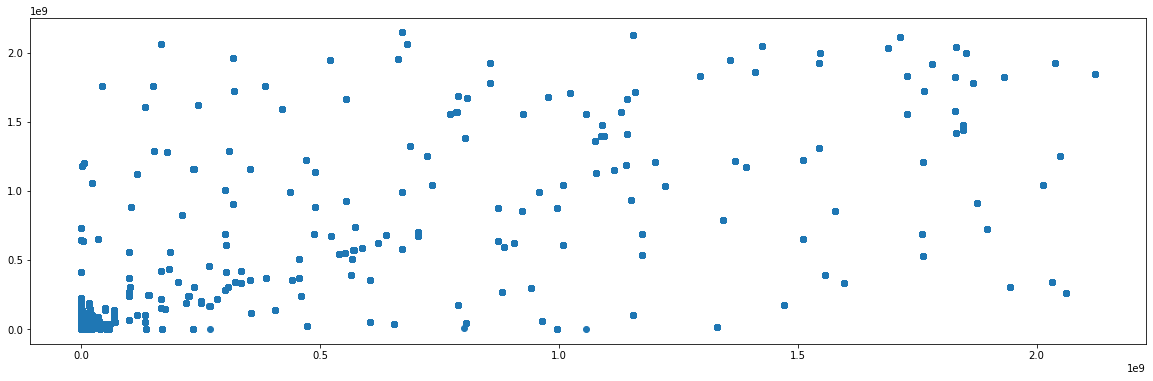

In [12]:
mta.dropna(inplace = True)
plt.figure(figsize = [20,6])
plt.scatter(x = mta['EXITS'], y = mta['ENTRIES'])

In [13]:
mta.shape

(2722610, 11)

<AxesSubplot:>

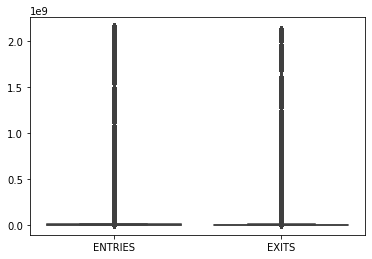

In [14]:
Box_plot_1 = pd.DataFrame(data = mta, columns = ['ENTRIES','EXITS'])
sns.boxplot(data = Box_plot_1)

In [15]:
Q1_n = mta["ENTRIES"].quantile(0.25)
Q3_n =  mta["ENTRIES"].quantile(0.75)

IQR_n = Q3_n - Q1_n 
mta = mta[(mta["ENTRIES"] >= Q1_n - 1.5 * IQR_n) & (mta["ENTRIES"] <= Q3_n + 1.5* IQR_n)]

In [16]:
Q1_x = mta["EXITS"].quantile(0.25)
Q3_x =  mta["EXITS"].quantile(0.75)

IQR_x = Q3_x - Q1_x 
mta = mta[(mta["EXITS"] >= Q1_x - 1.5 * IQR_x) & (mta["EXITS"] <= Q3_x + 1.5* IQR_x)]

In [17]:
mta.shape

(2221291, 11)

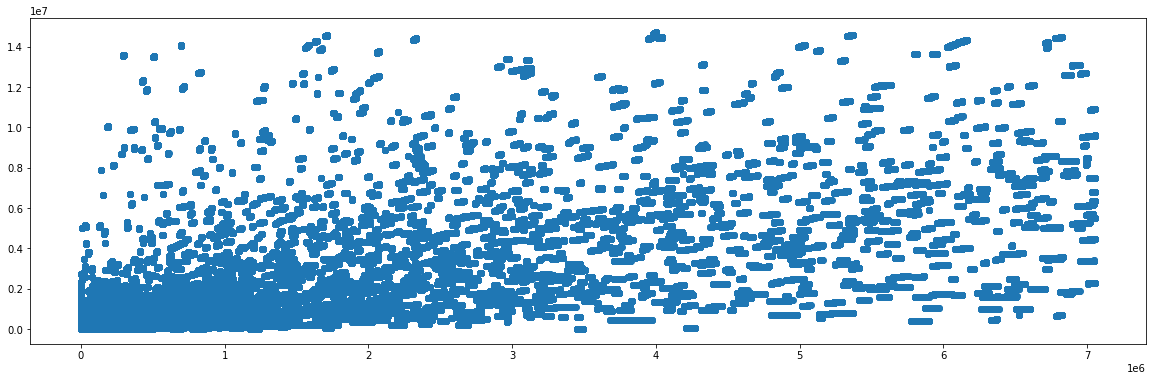

In [18]:
plt.figure(figsize = [20,6])
plt.scatter(x = mta['EXITS'], y = mta['ENTRIES'])

In [19]:
mta = mta[(mta['ENTRIES'] > 0) & (mta['EXITS'] > 0)]
mta.shape

(2083044, 11)

In [20]:
#Combining Date & time columns 

mta['datetime'] = pd.to_datetime(mta.DATE+' '+mta.TIME)
mta.sort_values(by=['datetime'], inplace=True)

In [21]:
#Convert ENTRIES and EXITS to number of entries and number of exits 

mta['n_ent'] = mta.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['ENTRIES'].diff()
mta['n_ext'] = mta.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['EXITS'].diff()

In [22]:
#Get total turnstile traffic out of entries and exits

mta['turn_traffic'] = abs(mta.n_ent + mta.n_ext)
mta.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS,datetime,n_ent,n_ext,turn_traffic
2633939,PTH04,R551,00-01-04,GROVE STREET,1,PTH,08/27/2021,23:57:09,REGULAR,14168,92933,2021-08-27 23:57:09,28.0,355.0,383.0
2637446,PTH12,R542,00-04-02,TWENTY THIRD ST,1,PTH,08/27/2021,23:57:50,REGULAR,31262,891186,2021-08-27 23:57:50,1.0,74.0,75.0
2639243,PTH17,R541,01-00-02,THIRTY THIRD ST,1,PTH,08/27/2021,23:59:08,REGULAR,1,98219,2021-08-27 23:59:08,0.0,92.0,92.0
2636132,PTH07,R550,00-01-08,CITY / BUS,1,PTH,08/27/2021,23:59:43,REGULAR,40889,124878,2021-08-27 23:59:43,9.0,54.0,63.0
2634218,PTH04,R551,00-04-05,GROVE STREET,1,PTH,08/27/2021,23:59:56,REGULAR,312741,159053,2021-08-27 23:59:56,8.0,29.0,37.0


(2083044, 15)


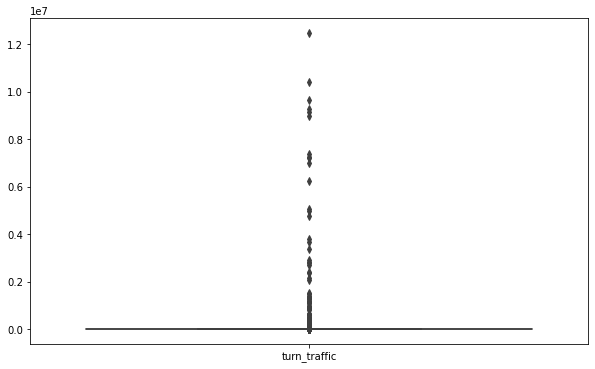

In [23]:
print(mta.shape)
plt.figure(figsize = [10,6])
Box_plot_2 = pd.DataFrame(data = mta, columns = ['turn_traffic'])
sns.boxplot(data = Box_plot_2, showfliers = True);

In [24]:
mta.describe()

,ENTRIES,EXITS,n_ent,n_ext,turn_traffic
count,2.083044e+06,2.083044e+06,2.079182e+06,2.079182e+06,2.079182e+06
mean,2.284885e+06,1.399433e+06,1.518667e+01,3.572745e+01,2.115994e+02
std,2.984531e+06,1.762605e+06,1.593695e+04,8.798514e+03,2.247011e+04
min,1.000000e+00,1.000000e+00,-1.073727e+07,-6.525597e+06,0.000000e+00
25%,1.774280e+05,1.001545e+05,5.000000e+00,7.000000e+00,1.800000e+01
50%,8.680340e+05,5.781530e+05,2.800000e+01,2.900000e+01,7.300000e+01
75%,3.413945e+06,2.114315e+06,8.100000e+01,8.000000e+01,1.730000e+02
max,1.471623e+07,7.059402e+06,5.043347e+06,4.596317e+06,1.249572e+07


In [25]:
median = mta["turn_traffic"].median()
mta["turn_traffic"] = np.where(mta["turn_traffic"] >70, median,mta["turn_traffic"])
mta.shape

(2083044, 15)

C:\Users\Manal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


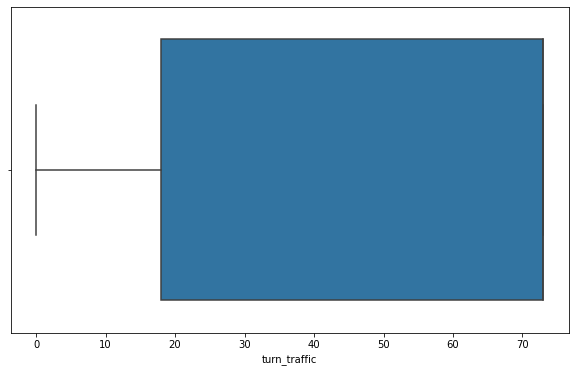

In [26]:
plt.figure(figsize=[10,6])
Box_plot_ = pd.DataFrame(data = mta, columns=['turn_traffic','ENTRIES','EXITS'])
sns.boxplot(mta['turn_traffic']);

In [27]:
mta = mta[(mta['turn_traffic'] > 0)]
mta.shape

(1908812, 15)

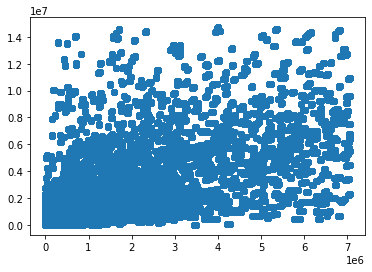

In [28]:
mta.drop_duplicates()
plt.scatter(x= mta['EXITS'], y = mta['ENTRIES'])

In [29]:
mask = (mta.n_ent >= 0) & (mta.n_ext >= 0) & (mta.turn_traffic >= 0) & (mta.turn_traffic < 3000)
mta = mta[mask]

In [30]:
#Drop unnecessary columns
mta.drop(labels=['LINENAME','DIVISON','DESC'], axis=1)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,datetime,n_ent,n_ext,turn_traffic
196535,R550,R072,00-03-0A,34 ST-HUDSON YD,05/29/2021,04:00:00,574261,68086,2021-05-29 04:00:00,7.0,0.0,7.0
15766,B020,R263,00-00-01,AVENUE H,05/29/2021,04:00:00,55304,16742,2021-05-29 04:00:00,1.0,8.0,9.0
24449,C024,R214,00-00-02,77 ST,05/29/2021,04:00:00,6298781,4233348,2021-05-29 04:00:00,2.0,5.0,7.0
92659,N340A,R115,01-03-03,169 ST,05/29/2021,04:00:00,3359928,402193,2021-05-29 04:00:00,1.0,10.0,11.0
21310,C009,R057,03-03-02,ATL AV-BARCLAY,05/29/2021,04:00:00,3479307,3275873,2021-05-29 04:00:00,13.0,13.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2633939,PTH04,R551,00-01-04,GROVE STREET,08/27/2021,23:57:09,14168,92933,2021-08-27 23:57:09,28.0,355.0,73.0
2637446,PTH12,R542,00-04-02,TWENTY THIRD ST,08/27/2021,23:57:50,31262,891186,2021-08-27 23:57:50,1.0,74.0,73.0
2639243,PTH17,R541,01-00-02,THIRTY THIRD ST,08/27/2021,23:59:08,1,98219,2021-08-27 23:59:08,0.0,92.0,73.0
2636132,PTH07,R550,00-01-08,CITY / BUS,08/27/2021,23:59:43,40889,124878,2021-08-27 23:59:43,9.0,54.0,63.0


In [31]:
#Add week days column to the dataframe

mta['day_of_week'] = mta['datetime'].dt.day_name()
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS,datetime,n_ent,n_ext,turn_traffic,day_of_week
196535,R550,R072,00-03-0A,34 ST-HUDSON YD,7,IRT,05/29/2021,04:00:00,REGULAR,574261,68086,2021-05-29 04:00:00,7.0,0.0,7.0,Saturday
15766,B020,R263,00-00-01,AVENUE H,BQ,BMT,05/29/2021,04:00:00,REGULAR,55304,16742,2021-05-29 04:00:00,1.0,8.0,9.0,Saturday
24449,C024,R214,00-00-02,77 ST,R,BMT,05/29/2021,04:00:00,REGULAR,6298781,4233348,2021-05-29 04:00:00,2.0,5.0,7.0,Saturday
92659,N340A,R115,01-03-03,169 ST,F,IND,05/29/2021,04:00:00,REGULAR,3359928,402193,2021-05-29 04:00:00,1.0,10.0,11.0,Saturday
21310,C009,R057,03-03-02,ATL AV-BARCLAY,BDNQR2345,BMT,05/29/2021,04:00:00,REGULAR,3479307,3275873,2021-05-29 04:00:00,13.0,13.0,26.0,Saturday


In [32]:
#Group stations by turnstile traffics 

stations_totals = mta.groupby('STATION', as_index=False).turn_traffic.sum()
stations_totals.sort_values(by='turn_traffic', ascending=False, inplace=True)
stations_totals.head(10)

,STATION,turn_traffic
60,34 ST-PENN STA,2127722.0
225,FULTON ST,1922535.0
232,GRD CNTRL-42 ST,1792705.0
45,23 ST,1672596.0
84,59 ST,1342446.0
109,86 ST,1328152.0
58,34 ST-HERALD SQ,1205747.0
124,ATL AV-BARCLAY,1141365.0
313,PATH NEW WTC,1140721.0
13,14 ST,1112100.0


In [33]:
mta.isnull().sum()

C/A             0
UNIT            0
SCP             0
STATION         0
LINENAME        0
DIVISON         0
DATE            0
TIME            0
DESC            0
ENTRIES         0
EXITS           0
datetime        0
n_ent           0
n_ext           0
turn_traffic    0
day_of_week     0
dtype: int64

# 3. Visualizing the data

### 3.1 Top 10 Busiest stations

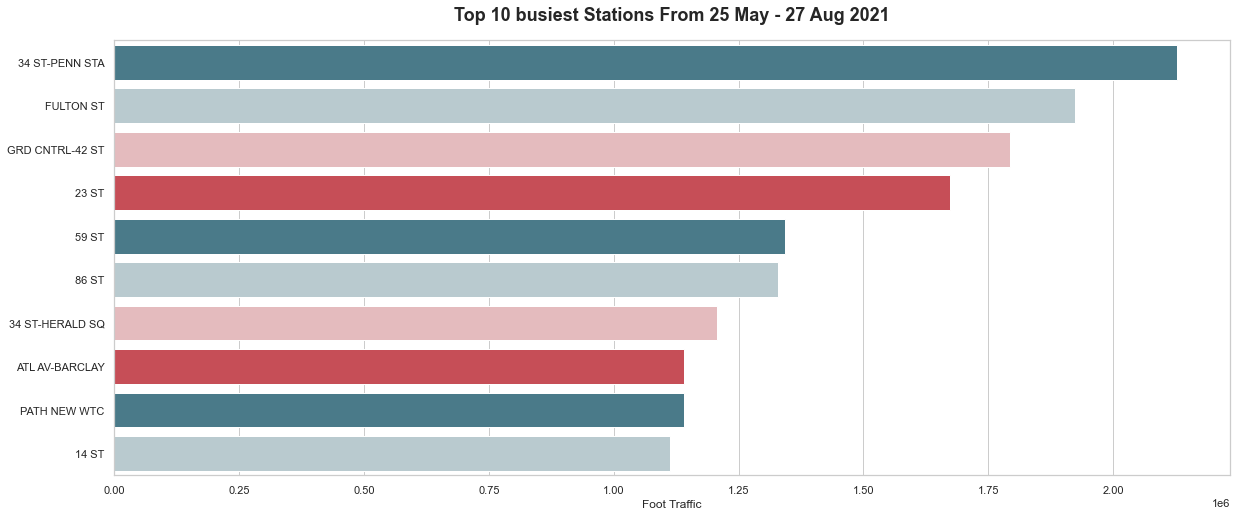

In [34]:
#Plot top 10 stations in terms of traffic 

reload(plt)

plt.figure(figsize=[20,8])
sns.set(style="whitegrid")
sns.barplot(x='turn_traffic', y='STATION', data=stations_totals.head(10),palette=sns.diverging_palette(220, 10, n=4), orient="h");

plt.title('Top 10 busiest Stations From 25 May - 27 Aug 2021',weight = 'bold', pad='20', size=18)
plt.xlabel('Foot Traffic')
plt.ylabel('')


plt.savefig('Top 10 Busiest sts.png')

### 3.2 plotting for each month alone to compare between them

In [35]:
#Filter on June data
mta_june =mta[(mta.DATE <= '06/30/2021')]

In [36]:
#Apllying the same steps done above for each month
mta_june['datetime'] = pd.to_datetime(mta.DATE+' '+mta.TIME)
mta_june.sort_values(by=['datetime'], inplace=True)

mta_june['n_ent'] = mta_june.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['ENTRIES'].diff()
mta_june['n_ext'] = mta_june.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['EXITS'].diff()

mta_june['turn_traffic'] = mta_june.n_ent + mta_june.n_ext

mask_june = (mta_june.n_ent >= 0) & (mta_june.n_ext >= 0) & (mta_june.turn_traffic >= 0) & (mta_june.turn_traffic < 3000)
mta_june = mta_june[mask_june]


mta_june['total_traffic'] = mta_june.groupby('STATION').turn_traffic.transform('sum')
mta_june.head()

stations_totals_june = mta_june[['STATION', 'total_traffic']]

stations_totals_june = stations_totals_june.drop_duplicates()

stations_totals_june.sort_values(by='total_traffic', ascending=False, inplace=True)

top_ten_stations_totals_june = pd.DataFrame(stations_totals_june.head(10))
top_ten_stations_totals_june

<ipython-input-36-9cc341e683ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_june['datetime'] = pd.to_datetime(mta.DATE+' '+mta.TIME)
<ipython-input-36-9cc341e683ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_june.sort_values(by=['datetime'], inplace=True)
<ipython-input-36-9cc341e683ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,STATION,total_traffic
138806,34 ST-PENN STA,2189952.0
162789,GRD CNTRL-42 ST,2003357.0
4658,23 ST,1626565.0
3739,34 ST-HERALD SQ,1590160.0
97795,FULTON ST,1464134.0
5742,14 ST-UNION SQ,1399654.0
24618,86 ST,1388487.0
296,59 ST,1311222.0
85760,JKSN HT-ROOSVLT,1259181.0
141364,TIMES SQ-42 ST,1245360.0


In [37]:
#Filter on July data
mta_july =mta[(mta.DATE >= '07/01/2021') & (mta.DATE >= '07/30/2021')]

mta_july['datetime'] = pd.to_datetime(mta.DATE+' '+mta.TIME)
mta_july.sort_values(by=['datetime'], inplace=True)

mta_july['n_ent'] = mta_july.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['ENTRIES'].diff()
mta_july['n_ext'] = mta_july.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['EXITS'].diff()

mta_july['turn_traffic'] = mta_july.n_ent + mta_july.n_ext

mask_july = (mta_july.n_ent >= 0) & (mta_june.n_ext >= 0) & (mta_june.turn_traffic >= 0) & (mta_june.turn_traffic < 3000)
mta_july = mta_july[mask_july]


mta_june['total_traffic'] = mta_june.groupby('STATION').turn_traffic.transform('sum')
mta_june.head()

stations_totals_july = mta_june[['STATION', 'total_traffic']]

stations_totals_july = stations_totals_july.drop_duplicates()

stations_totals_july.sort_values(by='total_traffic', ascending=False, inplace=True)

top_ten_stations_totals_july = pd.DataFrame(stations_totals_july.head(10))
top_ten_stations_totals_july

<ipython-input-37-db0709e76878>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_july['datetime'] = pd.to_datetime(mta.DATE+' '+mta.TIME)
<ipython-input-37-db0709e76878>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_july.sort_values(by=['datetime'], inplace=True)
<ipython-input-37-db0709e76878>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,STATION,total_traffic
138806,34 ST-PENN STA,2189952.0
162789,GRD CNTRL-42 ST,2003357.0
4658,23 ST,1626565.0
3739,34 ST-HERALD SQ,1590160.0
97795,FULTON ST,1464134.0
5742,14 ST-UNION SQ,1399654.0
24618,86 ST,1388487.0
296,59 ST,1311222.0
85760,JKSN HT-ROOSVLT,1259181.0
141364,TIMES SQ-42 ST,1245360.0


In [38]:
#Filter on August data
mta_Aug =mta[(mta.DATE >= '08/01/2021')]

mta_Aug['datetime'] = pd.to_datetime(mta.DATE+' '+mta.TIME)
mta_Aug.sort_values(by=['datetime'], inplace=True)

mta_Aug['n_ent'] = mta_Aug.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['ENTRIES'].diff()
mta_Aug['n_ext'] = mta_Aug.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['EXITS'].diff()

mta_Aug['turn_traffic'] = mta_Aug.n_ent + mta_Aug.n_ext

mask_Aug = (mta_Aug.n_ent >= 0) & (mta_Aug.n_ext >= 0) & (mta_Aug.turn_traffic >= 0) & (mta_Aug.turn_traffic < 3000)
mta_Aug = mta_Aug[mask_Aug]


mta_Aug['total_traffic'] = mta_Aug.groupby('STATION').turn_traffic.transform('sum')
mta_Aug.head()

stations_totals_Aug = mta_Aug[['STATION', 'total_traffic']]

stations_totals_Aug = stations_totals_Aug.drop_duplicates()

stations_totals_Aug.sort_values(by='total_traffic', ascending=False, inplace=True)

top_ten_stations_totals_Aug = pd.DataFrame(stations_totals_Aug.head(10))
top_ten_stations_totals_Aug

<ipython-input-38-9af1c59404ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_Aug['datetime'] = pd.to_datetime(mta.DATE+' '+mta.TIME)
<ipython-input-38-9af1c59404ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_Aug.sort_values(by=['datetime'], inplace=True)
<ipython-input-38-9af1c59404ac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,STATION,total_traffic
1942541,34 ST-PENN STA,1889348.0
2047986,GRD CNTRL-42 ST,1759438.0
1889713,23 ST,1344322.0
1889167,34 ST-HERALD SQ,1319426.0
1983139,FULTON ST,1290408.0
2042026,14 ST-UNION SQ,1143243.0
2053404,86 ST,1130253.0
2050422,59 ST,1109761.0
1888412,TIMES SQ-42 ST,1051825.0
1970597,JKSN HT-ROOSVLT,1046991.0


In [39]:
top_ten_stations_totals_june['Month'] = 'June'
top_ten_stations_totals_july['Month'] = 'July'
top_ten_stations_totals_Aug['Month'] = 'August'

top_ten_stations_totals_june = top_ten_stations_totals_june.reset_index()
top_ten_stations_totals_july = top_ten_stations_totals_july.reset_index()
top_ten_stations_totals_Aug = top_ten_stations_totals_Aug.reset_index()

In [40]:
#Concat all months together
top_ten_stations_together = pd.concat([top_ten_stations_totals_june, top_ten_stations_totals_july,top_ten_stations_totals_Aug], ignore_index = True)
top_ten_stations_together

,index,STATION,total_traffic,Month
0,138806,34 ST-PENN STA,2189952.0,June
1,162789,GRD CNTRL-42 ST,2003357.0,June
2,4658,23 ST,1626565.0,June
3,3739,34 ST-HERALD SQ,1590160.0,June
4,97795,FULTON ST,1464134.0,June
5,5742,14 ST-UNION SQ,1399654.0,June
6,24618,86 ST,1388487.0,June
7,296,59 ST,1311222.0,June
8,85760,JKSN HT-ROOSVLT,1259181.0,June
9,141364,TIMES SQ-42 ST,1245360.0,June


<Figure size 1440x576 with 0 Axes>

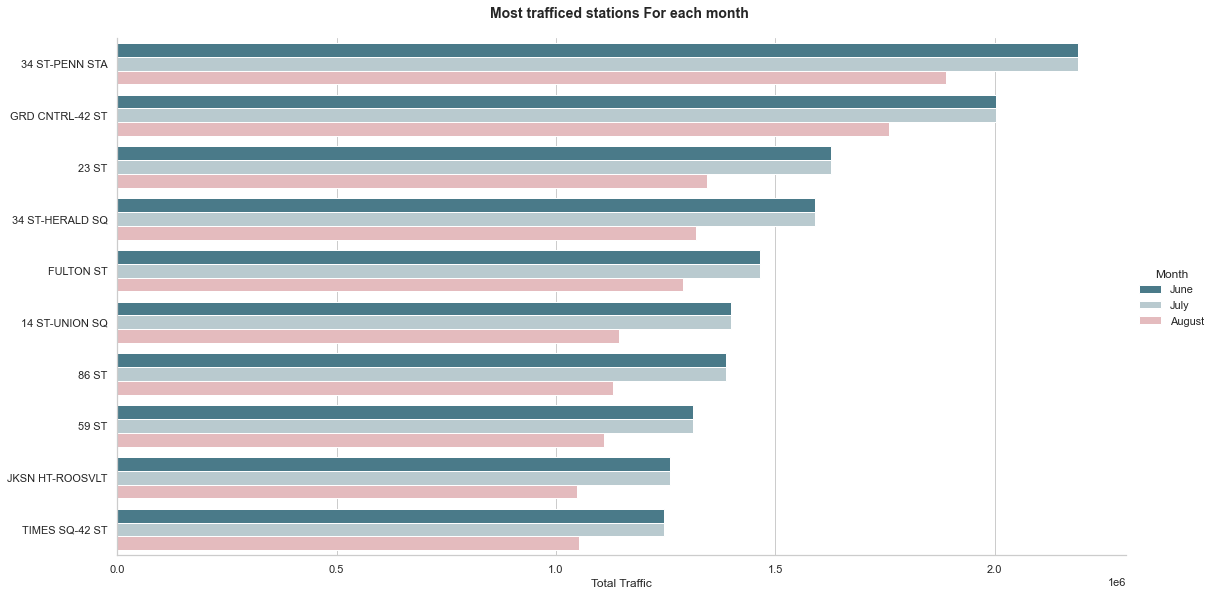

In [41]:
reload(plt)

plt.figure(figsize=[20,8])
sns.set(style="whitegrid")

all_months_together = sns.catplot(data = top_ten_stations_together, kind = "bar",
    y = "STATION", x ="total_traffic", hue = "Month", palette = sns.diverging_palette(220, 10, n=4), height=8,aspect = 2)

plt.xlabel('Total Traffic')
plt.ylabel('')
plt.title('Most trafficed stations For each month ', weight = 'bold', pad='20', size=14)


plt.savefig('Most trafficed stations from June to Augus 2021.png')

### 3.3 plotting the Average of Traffic in terms of week days

In [42]:
s = [each for _, each in stations_totals.head(10)['STATION'].items()]
top_ranked_df = pd.DataFrame(mta[mta.STATION.isin(s)])

In [43]:
df1 = mta[mta.STATION.isin(s)].groupby(['STATION', 'DATE', 'day_of_week'], as_index=False).turn_traffic.sum()
df1['Avg_of_traffic'] = df1.groupby(['STATION','day_of_week']).turn_traffic.transform('mean')
df1.drop_duplicates(inplace=True)
df1

,STATION,DATE,day_of_week,turn_traffic,Avg_of_traffic
0,14 ST,05/29/2021,Saturday,8752.0,12162.307692
1,14 ST,05/30/2021,Sunday,10181.0,11497.461538
2,14 ST,05/31/2021,Monday,10313.0,11844.307692
3,14 ST,06/01/2021,Tuesday,11799.0,12253.923077
4,14 ST,06/02/2021,Wednesday,12355.0,12506.307692
...,...,...,...,...,...
905,PATH NEW WTC,08/23/2021,Monday,12243.0,12659.000000
906,PATH NEW WTC,08/24/2021,Tuesday,12963.0,13114.538462
907,PATH NEW WTC,08/25/2021,Wednesday,13204.0,13114.615385
908,PATH NEW WTC,08/26/2021,Thursday,13518.0,13387.076923


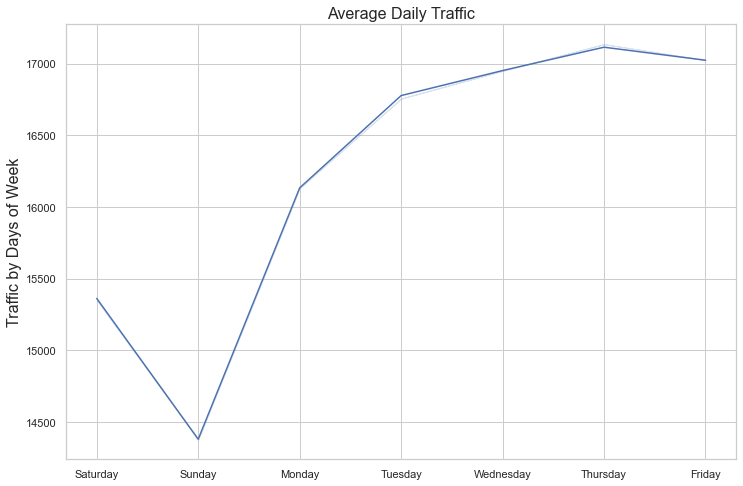

In [44]:
reload(plt)

plt.figure(figsize=[12,8])
sns.set_style('whitegrid')

sns.lineplot(x='day_of_week', y='Avg_of_traffic',  data=df1,ci=0, palette = sns.color_palette("BuPu_r") )
plt.xlabel('')
plt.ylabel('Traffic by Days of Week', fontsize=16)
plt.title('Average Daily Traffic', fontsize=16);

### 3.4 Heatmap for each station in(top 10  busiest stations) in terms of Time and Weekday

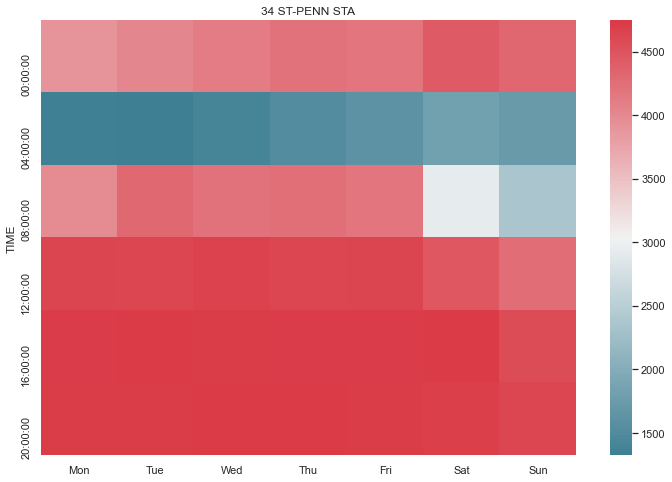

In [45]:
station_of_interest = '34 ST-PENN STA'

station_penn = mta[mta['STATION'] == station_of_interest]
time_interval = '4H'

stations_day = station_penn[['STATION', 'datetime','turn_traffic', 'day_of_week']]
stations_day_group = stations_day.groupby(['STATION','datetime'], as_index=False)
stations_day = stations_day_group[['turn_traffic']].sum()
rounded_day = stations_day.set_index('datetime').groupby(['STATION'])
rounded_day = rounded_day.resample(time_interval, convention='end').sum()

rounded_day = rounded_day.reset_index()
stations_day = rounded_day
stations_day['DAY'] = stations_day['datetime'].dt.dayofweek
stations_day['TIME'] = stations_day['datetime'].dt.time
stations_day
stations_day_group = stations_day.groupby(['STATION','DAY','TIME'])
stations_day_group = stations_day_group['turn_traffic'].mean().reset_index()

draw_station = stations_day_group

station_heatmap = draw_station.set_index(['DAY', 'TIME']).turn_traffic.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax0 = plt.subplots(figsize=(12, 8))
ax0.set(title= '' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax0, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.savefig('heatmap1.png')

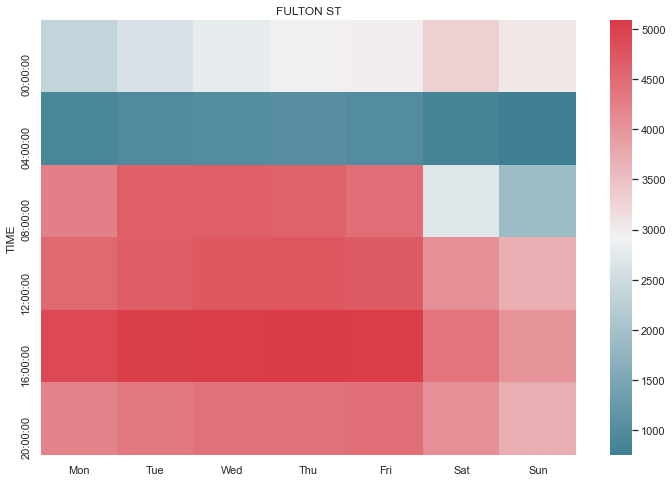

In [46]:
station_of_interest = 'FULTON ST'

station_fulton = mta[mta['STATION'] == station_of_interest]
time_interval = '4H'

stations_day = station_fulton[['STATION', 'datetime','turn_traffic', 'day_of_week']]
stations_day_group = stations_day.groupby(['STATION','datetime'], as_index=False)
stations_day = stations_day_group[['turn_traffic']].sum()
rounded_day = stations_day.set_index('datetime').groupby(['STATION'])
rounded_day = rounded_day.resample(time_interval, convention='end').sum()

rounded_day = rounded_day.reset_index()
stations_day = rounded_day
stations_day['DAY'] = stations_day['datetime'].dt.dayofweek
stations_day['TIME'] = stations_day['datetime'].dt.time
stations_day
stations_day_group = stations_day.groupby(['STATION','DAY','TIME'])
stations_day_group = stations_day_group['turn_traffic'].mean().reset_index()

draw_station = stations_day_group

station_heatmap = draw_station.set_index(['DAY', 'TIME']).turn_traffic.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax0 = plt.subplots(figsize=(12, 8))
ax0.set(title= '' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax0, cmap=sns.diverging_palette(220, 10, as_cmap=True))

plt.savefig('heatmap2.png')

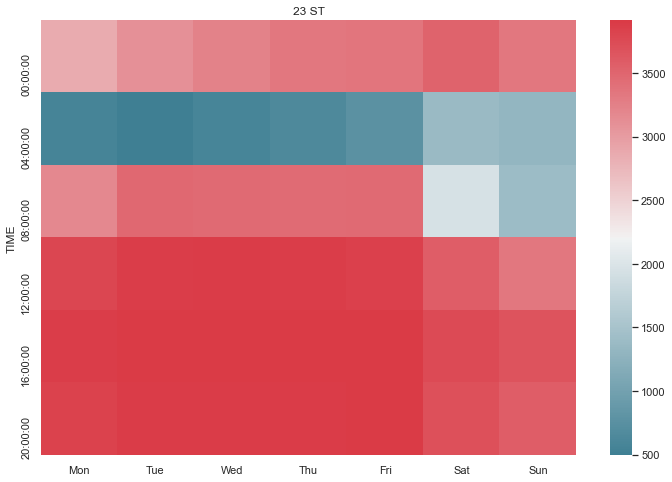

In [47]:
station_of_interest = '23 ST'
station_23 = mta[mta['STATION'] == station_of_interest]
time_interval = '4H'

stations_day = station_23[['STATION', 'datetime','turn_traffic', 'day_of_week']]
stations_day_group = stations_day.groupby(['STATION','datetime'], as_index=False)
stations_day = stations_day_group[['turn_traffic']].sum()
rounded_day = stations_day.set_index('datetime').groupby(['STATION'])
rounded_day = rounded_day.resample(time_interval, convention='end').sum()

rounded_day = rounded_day.reset_index()
stations_day = rounded_day
stations_day['DAY'] = stations_day['datetime'].dt.dayofweek
stations_day['TIME'] = stations_day['datetime'].dt.time
stations_day
stations_day_group = stations_day.groupby(['STATION','DAY','TIME'])
stations_day_group = stations_day_group['turn_traffic'].mean().reset_index()

draw_station = stations_day_group

station_heatmap = draw_station.set_index(['DAY', 'TIME']).turn_traffic.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax0 = plt.subplots(figsize=(12, 8))
ax0.set(title= '' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax0, cmap=sns.diverging_palette(220, 10, as_cmap=True))

plt.savefig('heatmap3.png')

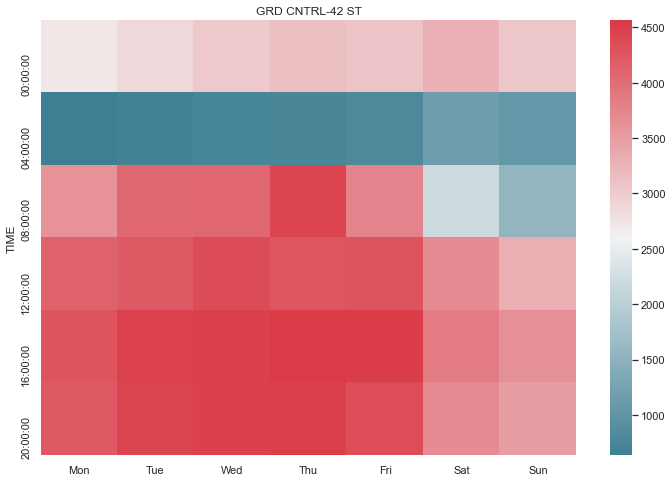

In [48]:
station_of_interest = 'GRD CNTRL-42 ST'

station_grd = mta[mta['STATION'] == station_of_interest]
time_interval = '4H'

stations_day = station_grd[['STATION', 'datetime','turn_traffic', 'day_of_week']]
stations_day_group = stations_day.groupby(['STATION','datetime'], as_index=False)
stations_day = stations_day_group[['turn_traffic']].sum()
rounded_day = stations_day.set_index('datetime').groupby(['STATION'])
rounded_day = rounded_day.resample(time_interval, convention='end').sum()

rounded_day = rounded_day.reset_index()
stations_day = rounded_day
stations_day['DAY'] = stations_day['datetime'].dt.dayofweek
stations_day['TIME'] = stations_day['datetime'].dt.time
stations_day
stations_day_group = stations_day.groupby(['STATION','DAY','TIME'])
stations_day_group = stations_day_group['turn_traffic'].mean().reset_index()

draw_station = stations_day_group

station_heatmap = draw_station.set_index(['DAY', 'TIME']).turn_traffic.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax0 = plt.subplots(figsize=(12, 8))
ax0.set(title= '' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax0, cmap=sns.diverging_palette(220, 10, as_cmap=True))

plt.savefig('heatmap4.png')